## 선형 회귀 분석 ( Linear Regression )


### 최소제곱오차 ( Mean Squared Error )


###

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus']=False

In [14]:
df = pd.read_table('cars.txt')
df.head()

,testcnt,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [15]:
x = df.speed
y = df.dist

In [16]:
result = stats.linregress(x,y)
print(result)

LinregressResult(slope=3.9324087591240864, intercept=-17.579094890510937, rvalue=0.8068949006892102, pvalue=1.4898364962951247e-12, stderr=0.41551277665712255)


속도와 제동거리 연관 x ( 귀무 )  
속도와 제동거리 연관 o ( 대립 )  
(검정) p-value 0.1 ( 귀무 10, 대립 90 )  
(감정) p-value 0.05 ( 귀무 5, 대립 95 )  

In [17]:
print('기울기 : ',result.slope)
print('절편 : ',result.intercept)
print('상관계수 : ',result.rvalue)
print('p-value : ',result.pvalue)
print('표준편차 : ',result.stderr)

# ry = polyval([result.slope, result.intercept], x)
# print(ry)

기울기 :  3.9324087591240864
절편 :  -17.579094890510937
상관계수 :  0.8068949006892102
p-value :  1.4898364962951247e-12
표준편차 :  0.41551277665712255


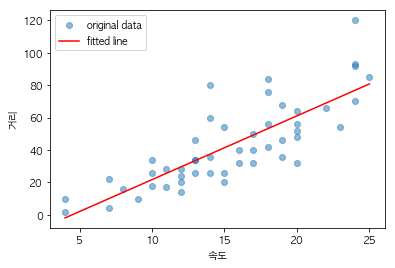

In [20]:
plt.plot(x, y, 'o', label='original data',alpha=0.5)
plt.plot(x, result.intercept + result.slope*x, 'r', label='fitted line')
plt.xlabel('speed')
plt.ylabel('dist')
plt.legend()
plt.show()

In [21]:
import seaborn as sns

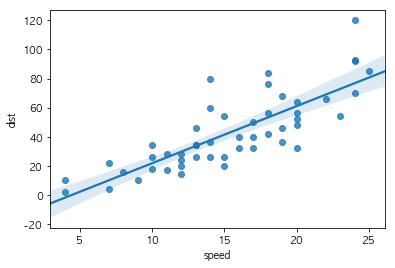

In [26]:
sns.regplot(x='speed',y='dist',data=df)
plt.show()

In [27]:
import statsmodels.api as sm

In [29]:
model = sm.OLS.from_formula('dist~speed',df) # dist~speed+oil 이렇게 컬럼을 적을 수 있음
result = model.fit()
print(result.summary())
print(result.params)

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           1.49e-12
Time:                        11:44:45   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.0